In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("Mall_Customers.csv", header=0)

In [3]:
X = data.iloc[:, [2,3, 4]].values

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
data.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

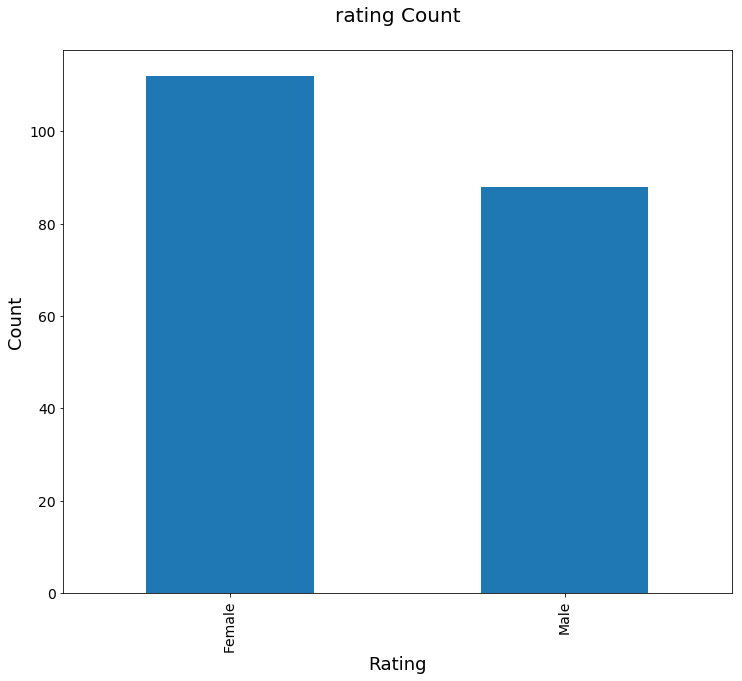

In [15]:
ax = data['Genre'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('rating Count\n', fontsize=20)
ax.set_xlabel('Rating', fontsize=18)
ax.set_ylabel('Count', fontsize=18);

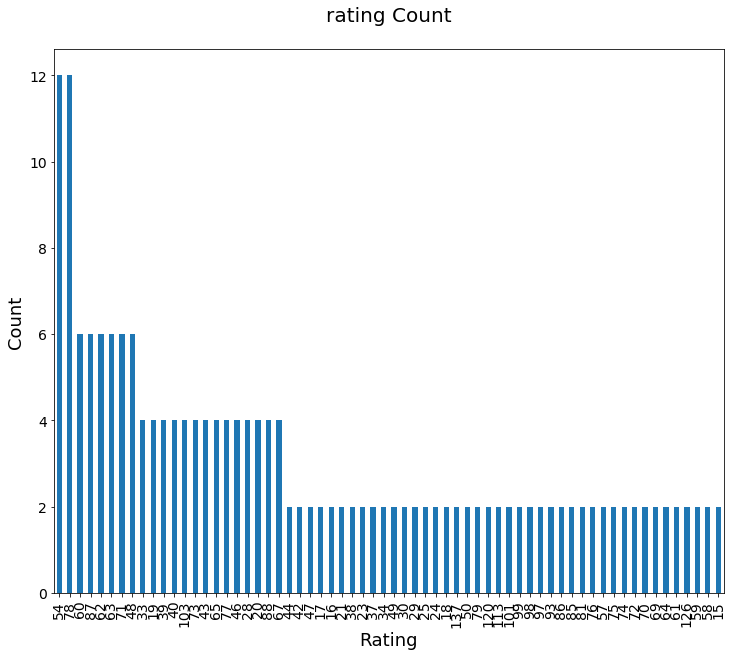

In [16]:
ax = data['Annual Income (k$)'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,10))
ax.set_title('rating Count\n', fontsize=20)
ax.set_xlabel('Rating', fontsize=18)
ax.set_ylabel('Count', fontsize=18);

In [17]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [18]:
from sklearn.cluster import KMeans

In [19]:
name=data['Genre']

In [21]:
data.drop(['CustomerID','Genre'], axis=1, inplace=True)

In [23]:
data['Age']=data['Age'].astype('category')

In [43]:
group=KMeans(n_clusters=5, init='k-means++', n_init=5,n_jobs=2)

In [69]:
y_means=group.fit_predict(X)

In [70]:
y_means

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [46]:
import matplotlib.pyplot as plt

In [47]:
print(group.labels_)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 0 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


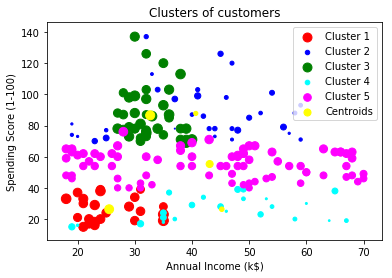

In [77]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1],X[y_means == 0, 2], c = 'red', label = 'Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1],X[y_means == 1, 2], c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1],X[y_means == 2, 2], c = 'green', label = 'Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1],X[y_means == 3, 2], c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1],X[y_means == 4, 1], c = 'magenta', label = 'Cluster 5')
plt.scatter(group.cluster_centers_[:, 0], group.cluster_centers_[:, 1],group.cluster_centers_[:, 2],c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()